## Business Case : Netflix Review

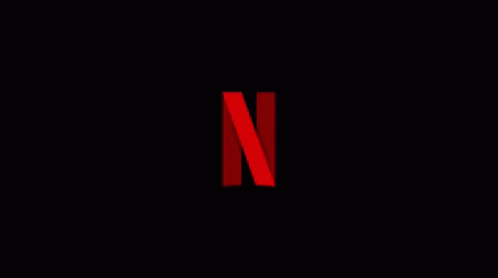

In [1]:
import numpy as np
import pandas as pd

In [3]:
netflix = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")

In [5]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [7]:
netflix_director = netflix[["title","director"]]

In [15]:
netflix_director["director"] = netflix_director["director"].apply(lambda x: str(x).split(",")).tolist()

/var/folders/__/bk220tls619bj0n4m4mkvvsm0000gn/T/ipykernel_92000/810480794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_director["director"] = netflix_director["director"].apply(lambda x: str(x).split(",")).tolist()


In [17]:
netflix_director.head(10)

,title,director
0,Dick Johnson Is Dead,[Kirsten Johnson]
1,Blood & Water,[nan]
2,Ganglands,[Julien Leclercq]
3,Jailbirds New Orleans,[nan]
4,Kota Factory,[nan]
5,Midnight Mass,[Mike Flanagan]
6,My Little Pony: A New Generation,"[Robert Cullen, José Luis Ucha]"
7,Sankofa,[Haile Gerima]
8,The Great British Baking Show,[Andy Devonshire]
9,The Starling,[Theodore Melfi]


In [19]:
netflix_director = netflix_director.explode("director")

In [21]:
netflix_director.head(10)

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
6,My Little Pony: A New Generation,José Luis Ucha
7,Sankofa,Haile Gerima
8,The Great British Baking Show,Andy Devonshire


In [23]:
netflix_cast = netflix[["title","cast"]]

In [25]:
netflix_cast["cast"] = netflix_cast["cast"].apply(lambda x: str(x).split(",")).tolist()

/var/folders/__/bk220tls619bj0n4m4mkvvsm0000gn/T/ipykernel_92000/1141141705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_cast["cast"] = netflix_cast["cast"].apply(lambda x: str(x).split(",")).tolist()


In [27]:
netflix_cast = netflix_cast.explode("cast")

In [29]:
netflix_cast.head(10)

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
1,Blood & Water,Khosi Ngema
1,Blood & Water,Gail Mabalane
1,Blood & Water,Thabang Molaba
1,Blood & Water,Dillon Windvogel
1,Blood & Water,Natasha Thahane
1,Blood & Water,Arno Greeff
1,Blood & Water,Xolile Tshabalala
1,Blood & Water,Getmore Sithole


In [31]:
netflix_country = netflix[["title","country"]]

In [33]:
netflix_country["country"] = netflix_country["country"].apply(lambda x: str(x).split(",")).tolist()

/var/folders/__/bk220tls619bj0n4m4mkvvsm0000gn/T/ipykernel_92000/4244668645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_country["country"] = netflix_country["country"].apply(lambda x: str(x).split(",")).tolist()


In [39]:
netflix_country = netflix_country.explode("country")

In [43]:
netflix_country.head(10)

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
5,Midnight Mass,nan
6,My Little Pony: A New Generation,nan
7,Sankofa,United States
7,Sankofa,Ghana
7,Sankofa,Burkina Faso


In [45]:
netflix_listed = netflix[["title","listed_in"]]

In [47]:
netflix_listed["listed_in"] =netflix_listed["listed_in"].apply(lambda x : str(x).split(",")).tolist()

/var/folders/__/bk220tls619bj0n4m4mkvvsm0000gn/T/ipykernel_92000/1019072321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_listed["listed_in"] =netflix_listed["listed_in"].apply(lambda x : str(x).split(",")).tolist()


In [49]:
netflix_listed = netflix_listed.explode("listed_in")

In [51]:
netflix_listed.rename({"listed_in" : "Genre"},axis = 1, inplace = True)

In [53]:
netflix_listed.head(10)

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
1,Blood & Water,TV Dramas
1,Blood & Water,TV Mysteries
2,Ganglands,Crime TV Shows
2,Ganglands,International TV Shows
2,Ganglands,TV Action & Adventure
3,Jailbirds New Orleans,Docuseries
3,Jailbirds New Orleans,Reality TV
4,Kota Factory,International TV Shows


In [55]:
netflix_merge1 = netflix_director.merge(netflix_cast,how = "inner",on = "title")

In [57]:
netflix_merge2 = netflix_merge1.merge(netflix_listed,how = "inner",on = "title")

In [59]:
netflix_merge3 = netflix_merge2.merge(netflix_country,how = "inner",on = "title")

In [61]:
netflix_merge3.head()

,title,director,cast,Genre,country
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa


In [63]:
netflix_final = netflix_merge3.merge(netflix[["show_id","type","title","date_added","release_year","rating","duration"]],on = "title",how = "left")

In [65]:
netflix_final

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Mozez Singh,Anita Shabdish,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202061,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202063,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [67]:
netflix_final["director"].replace(['nan'],['Unknown Director'],inplace=True)
netflix_final["cast"].replace(['nan'],['Unknown Actor'],inplace=True)
netflix_final["country"].replace(['nan'],[np.nan],inplace=True)
netflix_final.head()

/var/folders/__/bk220tls619bj0n4m4mkvvsm0000gn/T/ipykernel_92000/561859457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_final["director"].replace(['nan'],['Unknown Director'],inplace=True)
/var/folders/__/bk220tls619bj0n4m4mkvvsm0000gn/T/ipykernel_92000/561859457.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [69]:
netflix_final.isnull().sum()

title               0
director            0
cast                0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

In [71]:
netflix_final.loc[netflix_final["duration"].isnull(),'duration'] = netflix_final.loc[netflix_final["duration"].isnull(),'duration'].fillna(netflix_final['rating'])

In [73]:
netflix_final.isnull().sum()

title               0
director            0
cast                0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            0
dtype: int64

In [75]:
netflix_final.loc[netflix_final['rating'].str.contains('min',na = False),'rating'] = 'NR'
netflix_final['rating'].fillna('NR',inplace = True)

/var/folders/__/bk220tls619bj0n4m4mkvvsm0000gn/T/ipykernel_92000/3928619723.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_final['rating'].fillna('NR',inplace = True)


In [77]:
netflix_final.isnull().sum()

title               0
director            0
cast                0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating              0
duration            0
dtype: int64

In [79]:
arr = netflix_final.loc[netflix_final['date_added'].isnull(),'release_year'].unique()

In [81]:
for i in arr:
  imp = netflix_final.loc[netflix_final['release_year'] == i]['date_added'].mode().values[0]
  netflix_final.loc[netflix_final['release_year'] == i,'date_added'] = netflix_final.loc[netflix_final['release_year'] == i,'date_added'].fillna(imp)

In [83]:
arr1 = netflix_final.loc[netflix_final['country'].isnull()]['director'].unique()

In [85]:
for i in arr1:
  if i in netflix_final[~netflix_final['country'].isnull()]['director'].unique():
    imp1 = netflix_final.loc[netflix_final['director'] == i]['country'].mode().values[0]
    netflix_final.loc[netflix_final['director'] == i,'country'] = netflix_final.loc[netflix_final['director'] == i,'country'].fillna(imp1)

In [87]:
arr2 = netflix_final.loc[netflix_final['country'].isnull()]['cast'].unique()

In [89]:
for i in arr2:
  if i in netflix_final[~netflix_final['country'].isnull()]['cast'].unique():
    imp2 = netflix_final.loc[netflix_final['cast'] == i]['country'].mode().values[0]
    netflix_final.loc[netflix_final['cast'] == i,'country'] = netflix_final.loc[netflix_final['cast'] == i,'country'].fillna(imp2)

In [93]:
netflix_final.isnull().sum()

title              0
director           0
cast               0
Genre              0
country         2455
show_id            0
type               0
date_added         0
release_year       0
rating             0
duration           0
dtype: int64

In [95]:
netflix_final['country'].fillna('Unknown Country',inplace = True)

/var/folders/__/bk220tls619bj0n4m4mkvvsm0000gn/T/ipykernel_92000/3533950869.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_final['country'].fillna('Unknown Country',inplace = True)


In [97]:
netflix_final.isnull().sum()

title           0
director        0
cast            0
Genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [99]:
netflix_final.head()

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [101]:
netflix_final['duration'].value_counts()

duration
1 Season     35035
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: count, Length: 220, dtype: int64

In [103]:
netflix_final['duration'] = netflix_final['duration'].str.replace("min","")

In [105]:
netflix_final['duration']

0               90 
1         2 Seasons
2         2 Seasons
3         2 Seasons
4         2 Seasons
            ...    
202060         111 
202061         111 
202062         111 
202063         111 
202064         111 
Name: duration, Length: 202065, dtype: object

In [107]:
netflix_final['duration_copy'] = netflix_final['duration'].copy()

In [109]:
netflix_final1 = netflix_final.copy()

In [111]:
netflix_final1.head()

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2 Seasons


In [113]:
netflix_final1.loc[netflix_final1['duration_copy'].str.contains('Season'),'duration_copy'] = 0
netflix_final1['duration_copy'] = netflix_final1['duration_copy'].astype('int')
netflix_final1.head()

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [115]:
bins1 = [-1,1,50,80,100,120,150,200,315]
labels1 = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
netflix_final1['duration_copy'] = pd.cut(netflix_final1['duration_copy'],bins = bins1,labels = labels1)

In [117]:
netflix_final1

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,80-100
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Mozez Singh,Anita Shabdish,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111,100-120
202061,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111,100-120
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111,100-120
202063,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111,100-120


In [119]:
netflix_final1.loc[~netflix_final1['duration'].str.contains('Season'),'duration'] = netflix_final1.loc[~netflix_final1['duration'].str.contains('Season'),'duration_copy']

In [121]:
netflix_final1.drop('duration_copy',axis = 1, inplace = True)

In [123]:
netflix_final1.head(10)

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
5,Blood & Water,Unknown Director,Khosi Ngema,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
6,Blood & Water,Unknown Director,Khosi Ngema,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
7,Blood & Water,Unknown Director,Gail Mabalane,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
8,Blood & Water,Unknown Director,Gail Mabalane,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
9,Blood & Water,Unknown Director,Gail Mabalane,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [125]:
netflix_final1['duration'].value_counts()

duration
80-100        52992
100-120       48724
1 Season      35035
120-150       26691
2 Seasons      9559
50-80          7701
150-200        6737
3 Seasons      5084
1-50           2548
4 Seasons      2134
5 Seasons      1698
7 Seasons       843
6 Seasons       633
200-315         524
8 Seasons       286
9 Seasons       257
10 Seasons      220
13 Seasons      132
12 Seasons      111
15 Seasons       96
17 Seasons       30
11 Seasons       30
Name: count, dtype: int64

In [127]:
from datetime import datetime
from dateutil.parser import parse
arr=[]
for i in netflix_final1['date_added'].values:
  dt1=parse(i)
  arr.append(dt1.strftime('%Y-%m-%d'))
netflix_final1['Modified_Added_date'] =arr
netflix_final1['Modified_Added_date']=pd.to_datetime(netflix_final1['Modified_Added_date'])
netflix_final1['month_added']=netflix_final1['Modified_Added_date'].dt.month
netflix_final1['week_Added']=netflix_final1['Modified_Added_date'].dt.isocalendar().week
netflix_final1['year']=netflix_final1['Modified_Added_date'].dt.year
netflix_final1.head()

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


In [129]:
netflix_final1['title']=netflix_final1['title'].str.replace(r"\(.*\)","")
netflix_final1.head()

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


### Univariate Analysis in terms of counts of each column

In [233]:
#number of distinct titles on the basis of genre
df1 = netflix_final1.groupby("Genre").agg({"title":"nunique"})

In [245]:
df1

,Genre,title
0,Anime Features,50
1,Children & Family Movies,36
2,Classic & Cult TV,6
3,Classic Movies,36
4,Comedies,464
...,...,...
68,TV Dramas,67
69,TV Horror,11
70,TV Sci-Fi & Fantasy,1
71,TV Shows,16


In [201]:
df_top_genre = netflix_final1.groupby("Genre")["title"].agg("nunique").reset_index().sort_values(by =["title"],ascending = False).head(15)

In [203]:
df_top_genre

,Genre,title
13,International Movies,2624
49,Dramas,1600
44,Comedies,1210
37,Action & Adventure,859
47,Documentaries,829
9,Dramas,827
53,International TV Shows,774
12,Independent Movies,736
30,TV Dramas,696
20,Romantic Movies,613


In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

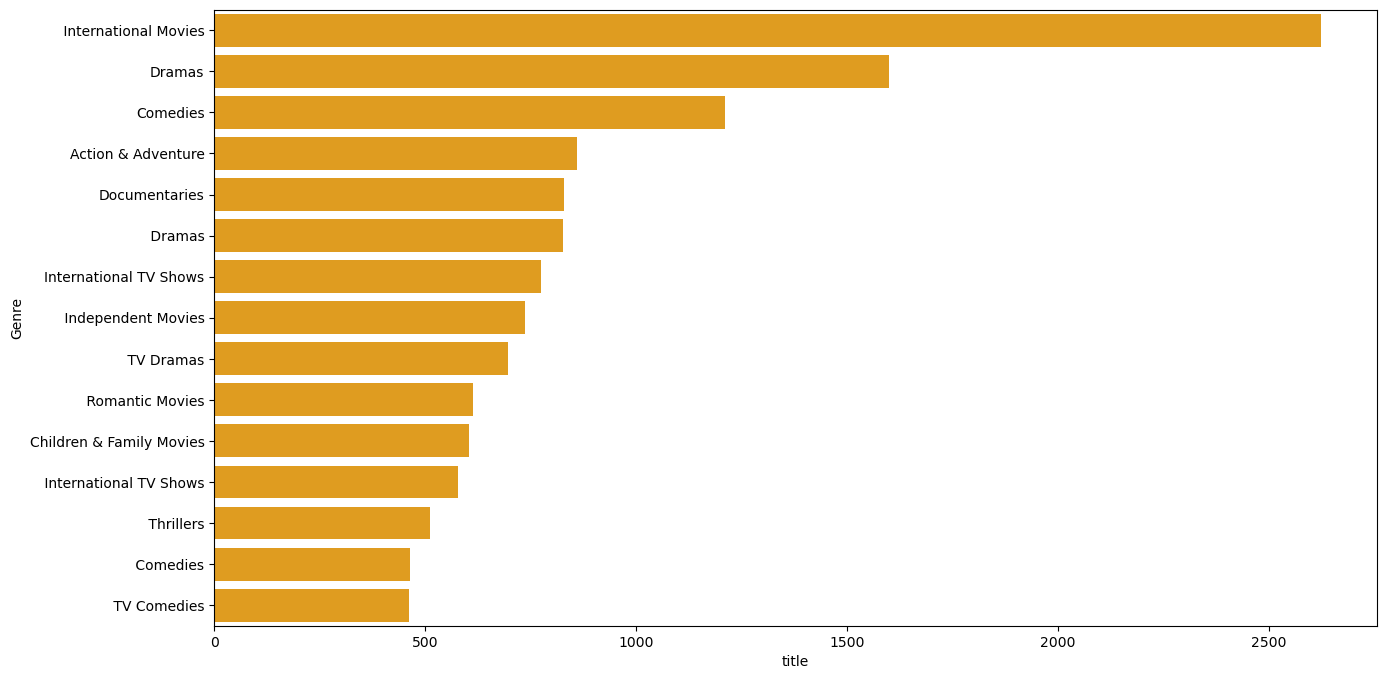

In [291]:
plt.figure(figsize=(15,8))
sns.barplot(data = df_top_genre,
            y = df_top_genre["Genre"],color = "orange",
            x = df_top_genre["title"])            
plt.show()

In [295]:
#number of distinct titles on the basis of type
netflix_final.groupby("type").agg({"title" : "nunique"}).reset_index()

,type,title
0,Movie,6131
1,TV Show,2676


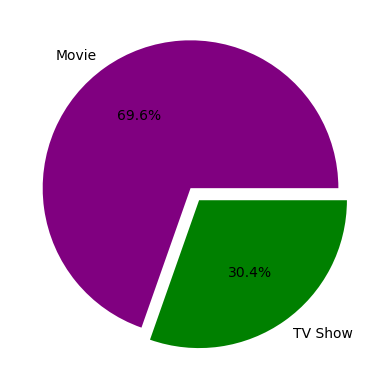

In [303]:
 df_type=netflix_final1.groupby('type').agg({"title":"nunique"}).reset_index()
 plt.pie(df_type['title'],explode=(0.05,0.05), labels=df_type['type'],colors=['purple','green'],autopct='%.1f%%')
 plt.show()

In [317]:
#number of distinct titles on the basis of country
netflix_final1.groupby("country").agg({"title":"nunique"}).reset_index().sort_values("title",ascending = False).head(10)

,country,title
191,United States,3764
141,India,1093
190,United Kingdom,650
106,United States,490
148,Japan,278
122,Canada,277
132,France,221
179,South Korea,214
192,Unknown Country,200
34,France,193


In [333]:
netflix_final1['country'] = netflix_final1['country'].str.replace(' ', '')
netflix_final1.head()

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,UnitedStates,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,SouthAfrica,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,SouthAfrica,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,SouthAfrica,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,SouthAfrica,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


In [335]:
top_5_country = netflix_final1.groupby("country").agg({"title":"nunique"}).reset_index().sort_values("title",ascending = False).head(5)

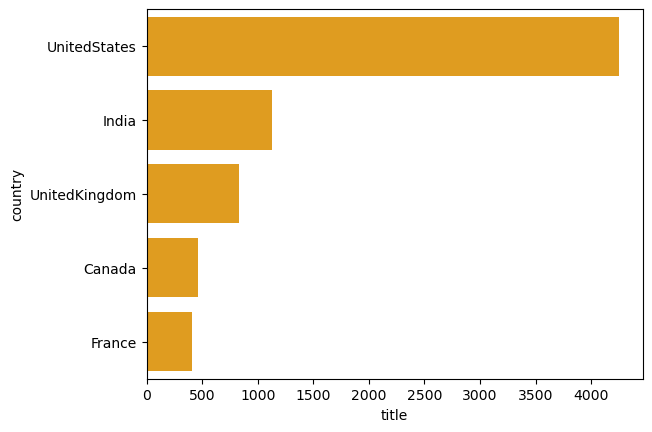

In [339]:
sns.barplot(data = top_5_country,
            y = top_5_country["country"],color = "orange",
            x = top_5_country["title"])            
plt.show()

In [365]:
netflix_final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   title                202065 non-null  object        
 1   director             202065 non-null  object        
 2   cast                 202065 non-null  object        
 3   Genre                202065 non-null  object        
 4   country              202065 non-null  object        
 5   show_id              202065 non-null  object        
 6   type                 202065 non-null  object        
 7   date_added           202065 non-null  object        
 8   release_year         202065 non-null  int64         
 9   rating               202065 non-null  object        
 10  duration             202065 non-null  object        
 11  Modified_Added_date  202065 non-null  datetime64[ns]
 12  month_added          202065 non-null  int32         
 13  week_Added    

In [367]:
def spaces(x):
    c1 = 0
    c2 = 0
    s = ""
    for i in x:
        if i.upper() == x[c1]:
            if  c1 <= 1:
                s+=x[c1]
            else:
                s = s+ " " +x[c1]
        else:
            s+=x[c2]
        c1+=1
        c2+=1
    return s

In [369]:
netflix_final1["country"] = netflix_final1["country"].apply(spaces)

In [371]:
netflix_final1.head()

,title,director,cast,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


In [373]:
top_5_country = netflix_final1.groupby("country").agg({"title":"nunique"}).reset_index().sort_values("title",ascending = False).head(5)

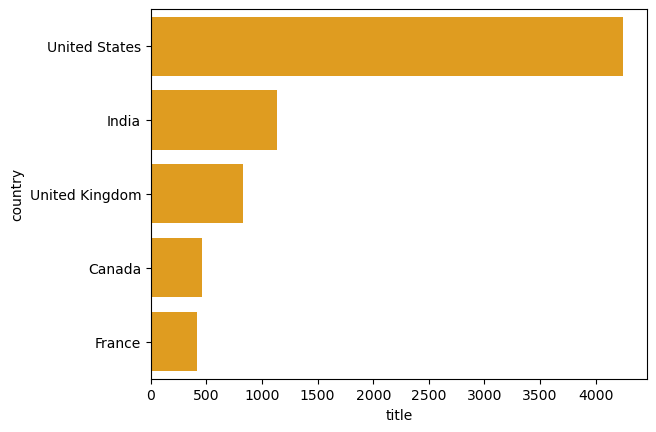

In [375]:
sns.barplot(data = top_5_country,
            y = top_5_country["country"],color = "orange",
            x = top_5_country["title"])            
plt.show()

In [383]:
#number of distinct titles on the basis of rating
top_rating = netflix_final1.groupby("rating").agg({"title":"nunique"}).reset_index().sort_values("title",ascending = False).head(15)

In [387]:
top_rating.head()

,rating,title
8,TV-MA,3207
6,TV-14,2160
9,TV-PG,863
5,R,799
4,PG-13,490


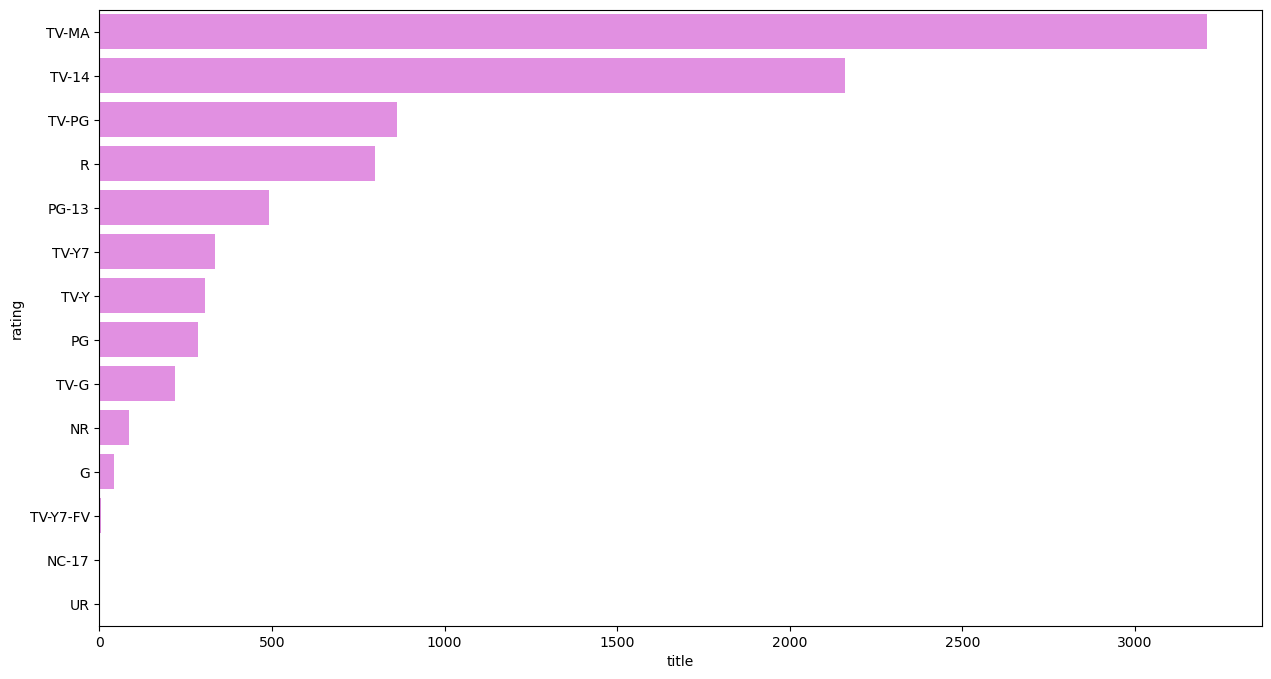

In [411]:
plt.figure(figsize = (15,8))
sns.barplot(data = top_rating,
            y = top_rating["rating"],color = "violet",
            x = top_rating["title"])
plt.show()

In [401]:
#number of distinct titles on the basis of duration
top_duration=netflix_final1.groupby("duration").agg({"title" : "nunique"}).reset_index().sort_values("title", ascending = False).head(15)
top_duration

,duration,title
20,80-100,2222
0,1 Season,1793
3,100-120,1672
6,120-150,897
16,50-80,808
11,2 Seasons,425
1,1-50,287
9,150-200,226
13,3 Seasons,199
14,4 Seasons,95


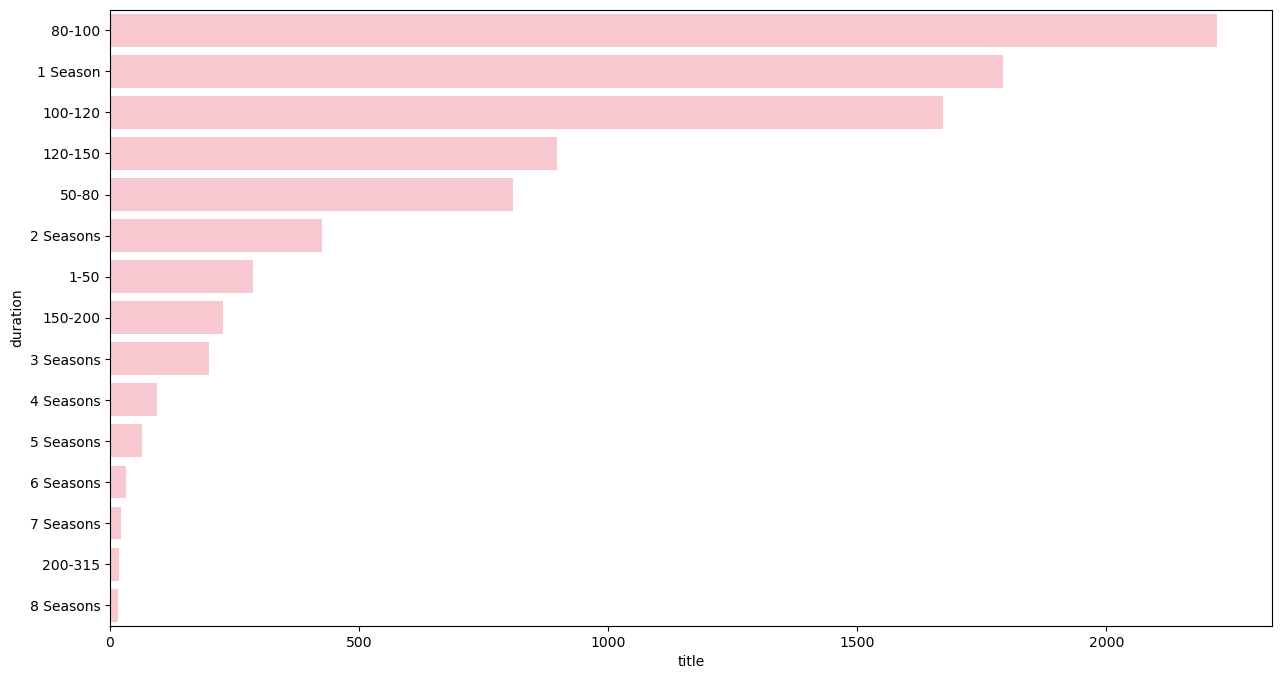

In [409]:
plt.figure(figsize = (15,8))
sns.barplot(data = top_duration,
            y = "duration",color = "pink",
            x = "title")
plt.show()

In [447]:
#number of distinct titles on the basis of Actors
top_actor = netflix_final1.groupby("cast").agg({"title" : "nunique"}).reset_index().sort_values("title", ascending = False).head(15)
top_actor

,cast,title
38982,Unknown Actor,825
2612,Anupam Kher,39
26941,Rupa Bhimani,31
30303,Takahiro Sakurai,30
15541,Julie Tejwani,28
23624,Om Puri,27
25410,Rajesh Kava,26
38445,Shah Rukh Khan,26
4186,Boman Irani,25
23956,Paresh Rawal,25


In [449]:
top_actor = top_actor[top_actor["cast"] != "Unknown Actor"]

In [451]:
top_actor

,cast,title
2612,Anupam Kher,39
26941,Rupa Bhimani,31
30303,Takahiro Sakurai,30
15541,Julie Tejwani,28
23624,Om Puri,27
25410,Rajesh Kava,26
38445,Shah Rukh Khan,26
4186,Boman Irani,25
23956,Paresh Rawal,25
33367,Yuki Kaji,25


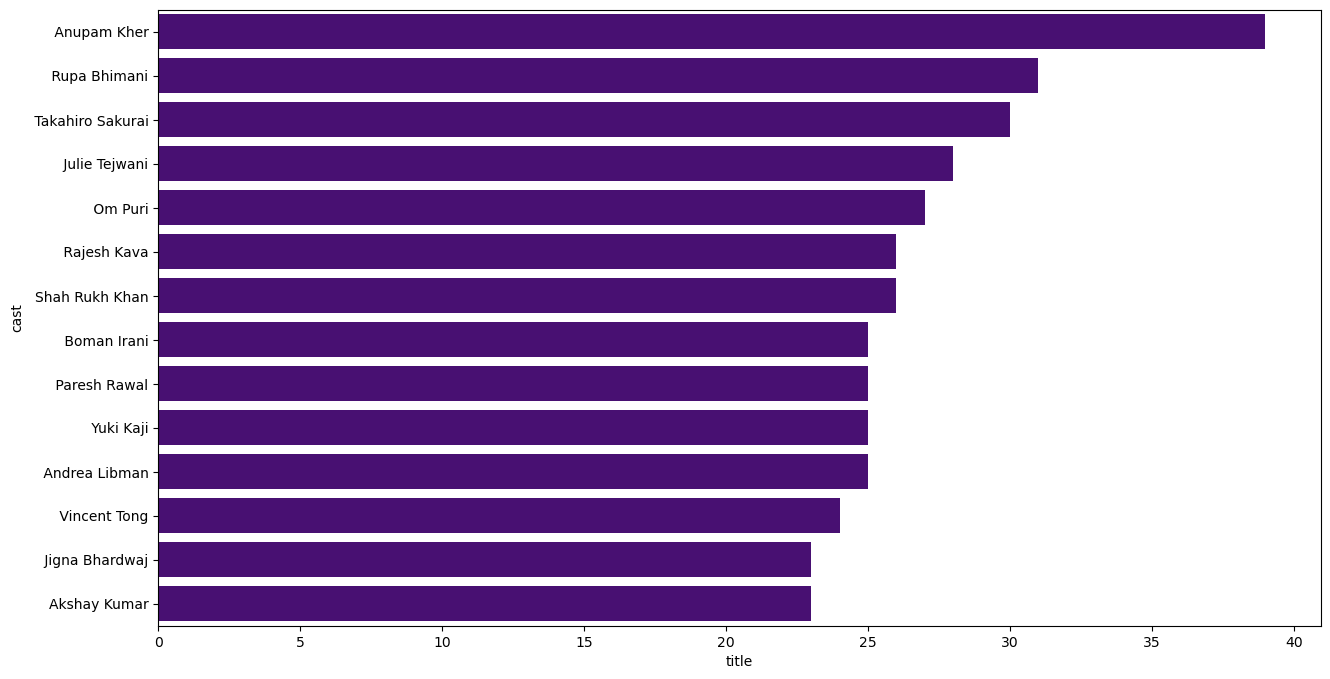

In [453]:
plt.figure(figsize = (15,8))
sns.barplot(data = top_actor,
            y = "cast",color = "indigo",
            x = "title")
plt.show()

In [455]:
#number of distinct titles on the basis of Actors
top_director = netflix_final1.groupby("director").agg({"title" : "nunique"}).reset_index().sort_values("title", ascending = False).head(15)
top_director

,director,title
4905,Unknown Director,2634
4020,Rajiv Chilaka,22
261,Jan Suter,18
4067,Raúl Campos,18
3235,Marcus Raboy,16
4651,Suhas Kadav,16
2450,Jay Karas,15
1382,Cathy Garcia-Molina,13
2447,Jay Chapman,12
3306,Martin Scorsese,12


In [461]:
top_director = top_director[top_director["director"] != "Unknown Director"]

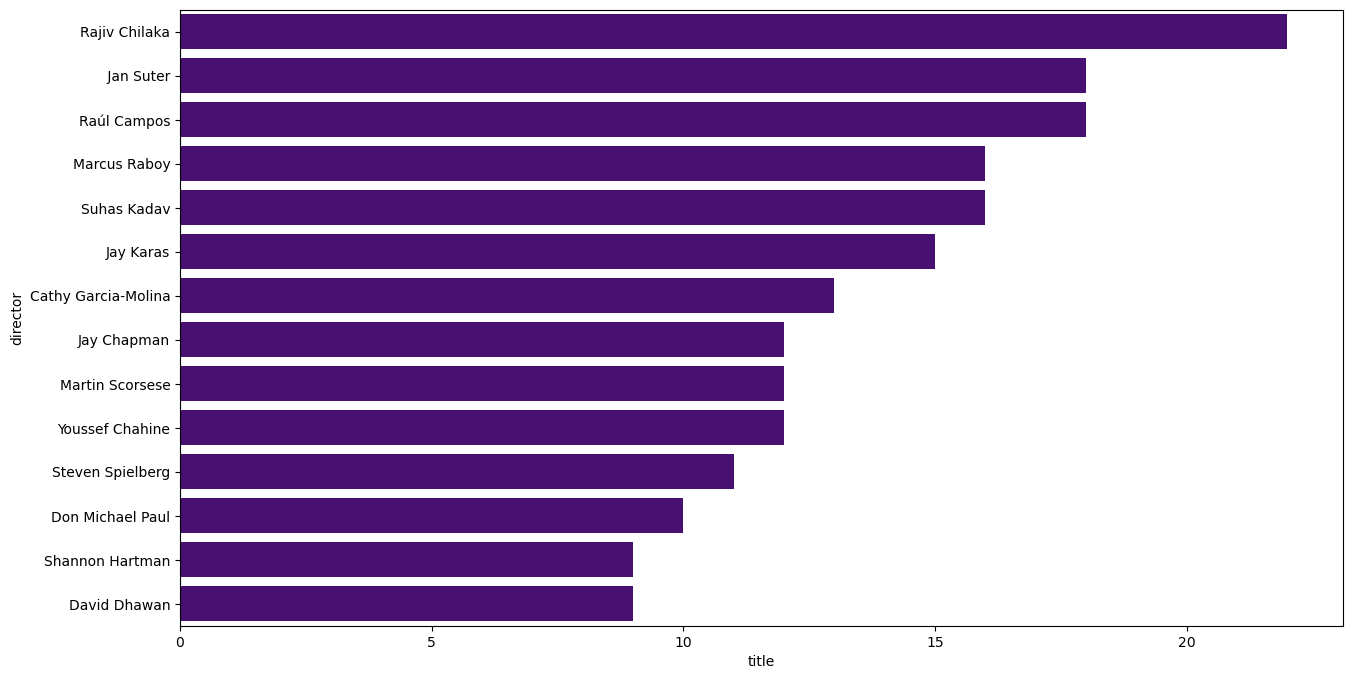

In [465]:
plt.figure(figsize = (15,8))
sns.barplot(data = top_director,
            y = "director",color = "indigo",
            x = "title")
plt.show()

In [467]:
#number of distinct titles on the basis of year
df_year = netflix_final1.groupby("year").agg({"title" : "nunique"}).reset_index().sort_values("title", ascending = False).head(15)
df_year

,year,title
11,2019,2018
12,2020,1879
10,2018,1650
13,2021,1501
9,2017,1189
8,2016,432
7,2015,82
6,2014,24
3,2011,13
5,2013,11


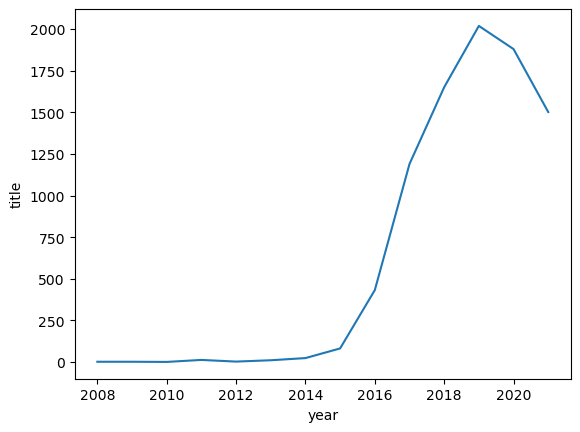

In [471]:
sns.lineplot(data = df_year,
             y = "title",
             x = "year")
plt.show()